In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.datasets import mnist
import os

import numpy as np
import random
import matplotlib.pyplot as plt



In [31]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [32]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of y_train: {y_train.shape}")
print()
print(f"Shape of x_test: {x_test.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


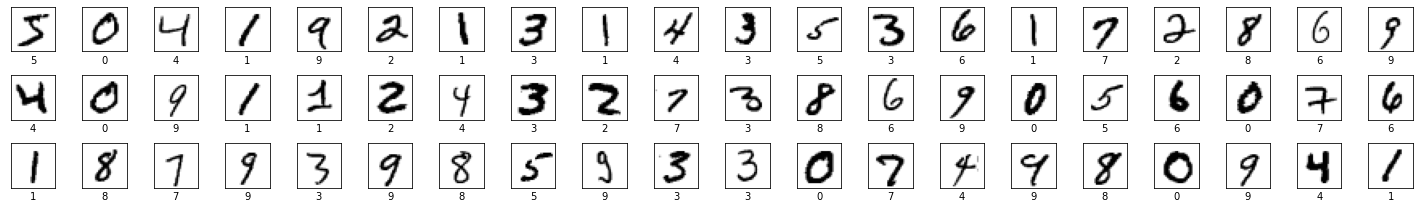

In [34]:
R=3
C=20
i=0;
plt.figure(figsize=(20,3))
for r in range(R):
  for c in range(C):
    plt.subplot(R,C,i+1);
    plt.imshow(x_train[i],cmap=plt.cm.gray_r)
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

    i+=1
plt.tight_layout()

plt.show()

In [35]:

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
x_train, x_test = x_train / 255.0, x_test / 255.0



In [41]:

model = keras.Sequential([
    keras.Input(shape=(28,28,1)),
    
    
    layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu'), 
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 64)        1664      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

In [55]:

#model.compile(
 #  optimizer='RMSProp', 
 #  loss='sparse_categorical_crossentropy', 
 #metrics=['accuracy']
 #)

In [56]:
#h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2,batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 70s 46ms/step - loss: 0.0074 - accuracy: 0.9977 - val_loss: 0.0658 - val_accuracy: 0.9902
Epoch 2/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0067 - accuracy: 0.9982 - val_loss: 0.0668 - val_accuracy: 0.9904
Epoch 3/5
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0063 - accuracy: 0.9984 - val_loss: 0.0785 - val_accuracy: 0.9905
Epoch 4/5
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0056 - accuracy: 0.9987 - val_loss: 0.0822 - val_accuracy: 0.9917
Epoch 5/5
1500/1500 [==============================] - 68s 46ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 0.0915 - val_accuracy: 0.9900


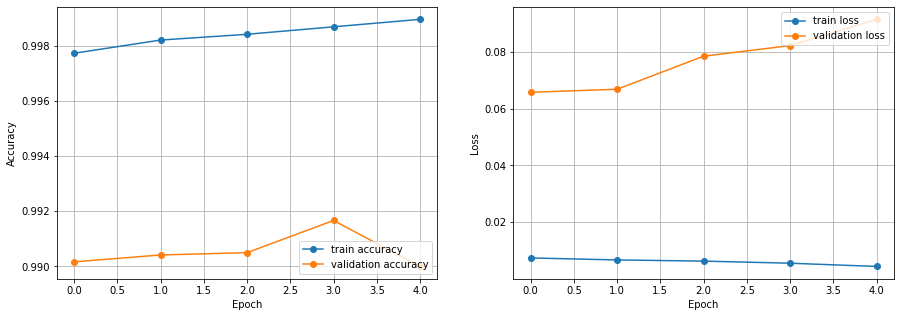

In [58]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [57]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 [==============================] - 4s 13ms/step - loss: 0.0768 - accuracy: 0.9906

Test accuracy: 0.9905999898910522

Test loss: 0.0768323689699173


In [59]:

model.compile(
  optimizer='adam', 
 loss='sparse_categorical_crossentropy', 
metrics=['accuracy']
 )

In [60]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2,batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 67s 45ms/step - loss: 0.0153 - accuracy: 0.9963 - val_loss: 0.0634 - val_accuracy: 0.9895
Epoch 2/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0125 - accuracy: 0.9963 - val_loss: 0.0470 - val_accuracy: 0.9908
Epoch 3/5
1500/1500 [==============================] - 72s 48ms/step - loss: 0.0115 - accuracy: 0.9962 - val_loss: 0.0618 - val_accuracy: 0.9888
Epoch 4/5
1500/1500 [==============================] - 71s 48ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.0755 - val_accuracy: 0.9862
Epoch 5/5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0079 - accuracy: 0.9976 - val_loss: 0.0609 - val_accuracy: 0.9893


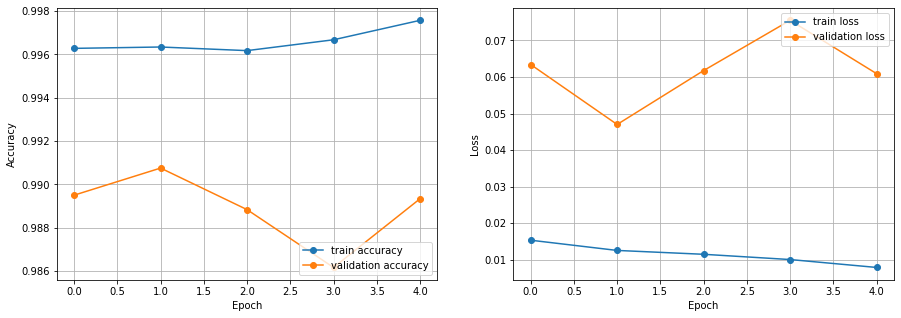

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [62]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 [==============================] - 5s 14ms/step - loss: 0.0457 - accuracy: 0.9911

Test accuracy: 0.991100013256073

Test loss: 0.04568065330386162


In [46]:
model.compile(
   optimizer='SGD', 
   loss='sparse_categorical_crossentropy', 
   metrics=['accuracy']
 )

In [47]:
h = model.fit(x=x_train, y=y_train, epochs=5, validation_split=0.2,batch_size=32)

Epoch 1/5
1500/1500 [==============================] - 68s 45ms/step - loss: 0.0059 - accuracy: 0.9981 - val_loss: 0.0368 - val_accuracy: 0.9909
Epoch 2/5
1500/1500 [==============================] - 69s 46ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 0.0367 - val_accuracy: 0.9911
Epoch 3/5
1500/1500 [==============================] - 70s 47ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 0.0374 - val_accuracy: 0.9915
Epoch 4/5
1500/1500 [==============================] - 71s 47ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 0.0373 - val_accuracy: 0.9916
Epoch 5/5
1500/1500 [==============================] - 70s 47ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0380 - val_accuracy: 0.9916


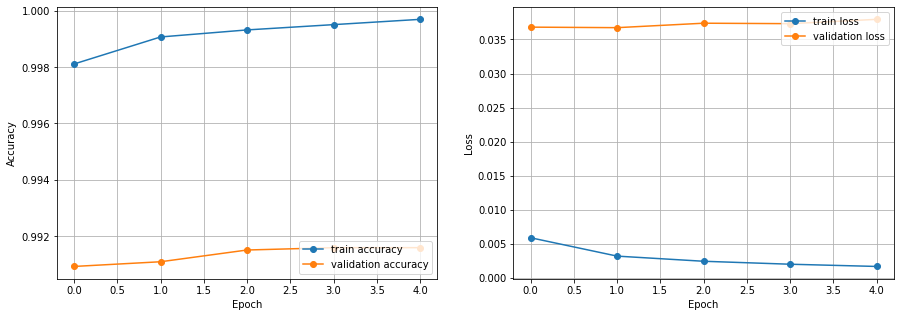

In [48]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [49]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)
print('\nTest loss:', test_loss)

313/313 [==============================] - 4s 13ms/step - loss: 0.0311 - accuracy: 0.9920

Test accuracy: 0.9919999837875366

Test loss: 0.031087854877114296
